In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import cv2 as cv
import torchvision

In [2]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image

In [3]:
from google.colab import files
uploaded = files.upload()  #Contains image path as key

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg


In [6]:
image_paths=list(uploaded.keys()) #Storing image paths as list

In [8]:
model=fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 171MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [55]:
output=[]
im=[]
im_tensor=[]
for path in image_paths:
  im.append(Image.open(path))
for i in im: #Converting into PIL image
  im_tensor.append(F.to_tensor(i)) #Converting PIL image into Tensors
for i in im_tensor:
  with torch.no_grad():
    output.append(model([i]))  #Passing Tensors into model

In [63]:
im_np=[]
boxes=[]
labels=[]
scores=[]
for i in range(len(output)):
  im=Image.open(image_paths[i])
  im_np_var=np.array(im)  #Opening an image as PIL image
  im_np.append(im_np_var)  #Converting PIL Image into NumPy array
  curr_box=output[i][0]['boxes']
  curr_label=output[i][0]['labels']
  curr_score=output[i][0]['scores']
  boxes.append(curr_box)
  labels.append(curr_label)
  scores.append(curr_score)
  for j in range(len(boxes)):
    if curr_score[j].item()>0.5:
      box=curr_box[j].cpu().numpy().astype(int)
      label=curr_label[j].item()
      score=curr_score[j].item()
      cv.rectangle(im_np_var,(box[0],box[1]),(box[2],box[3]),(0,255,0),2)
      text=f'{label} ({score:.2f})'
      cv.putText(im_np_var,text,(box[0],box[1]-10),cv.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),1)

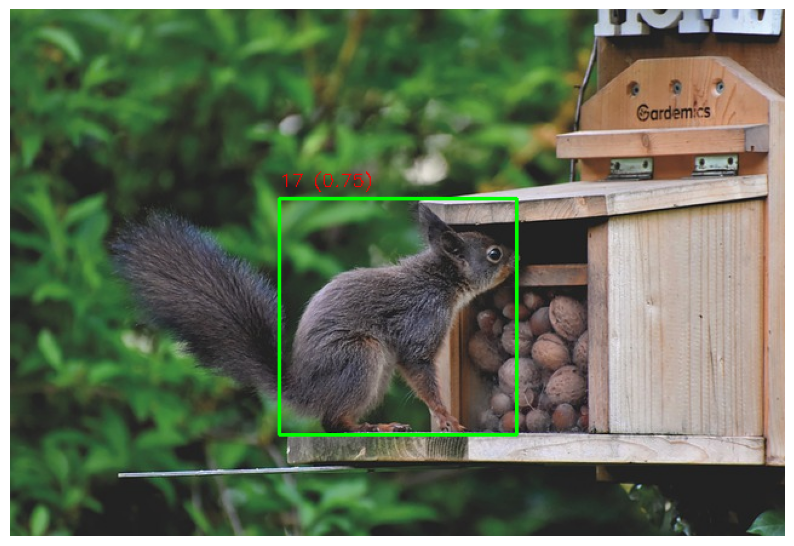

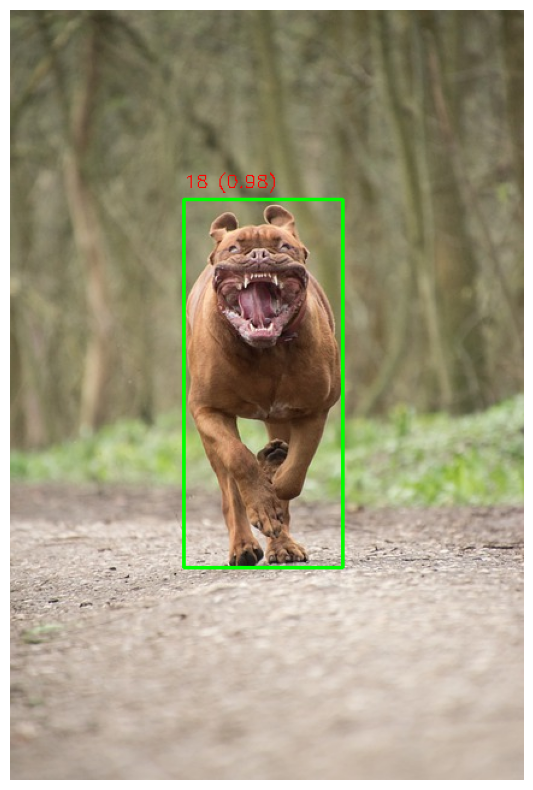

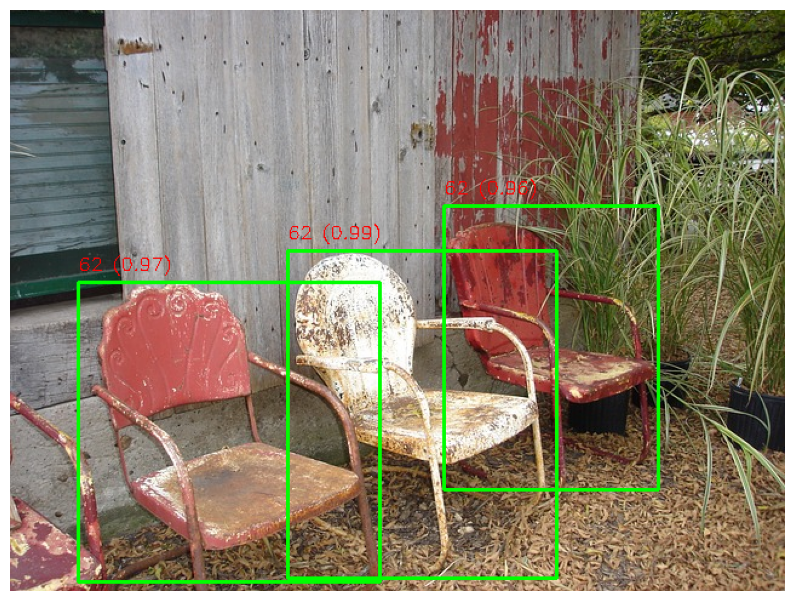

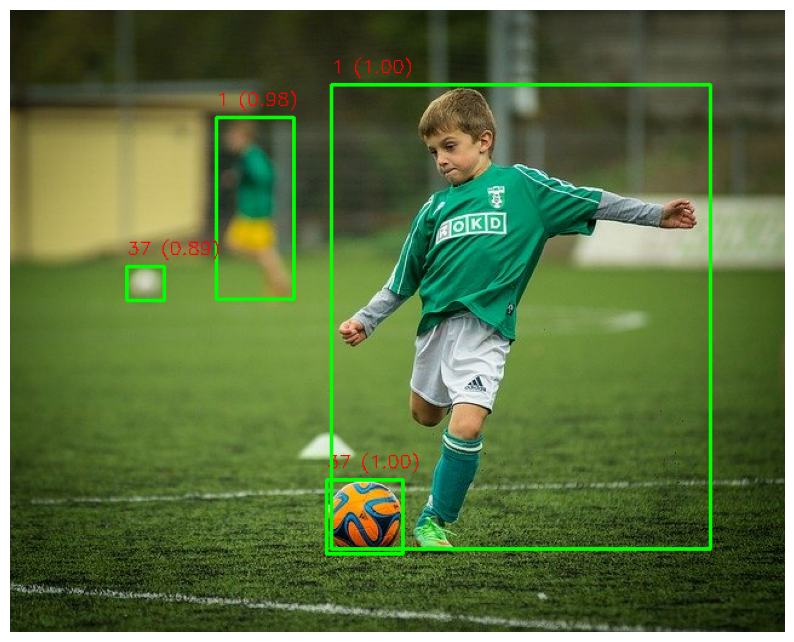

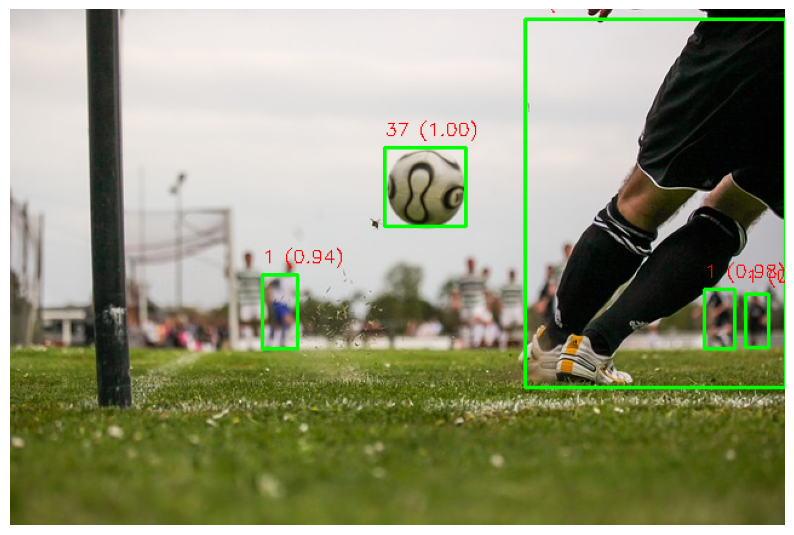

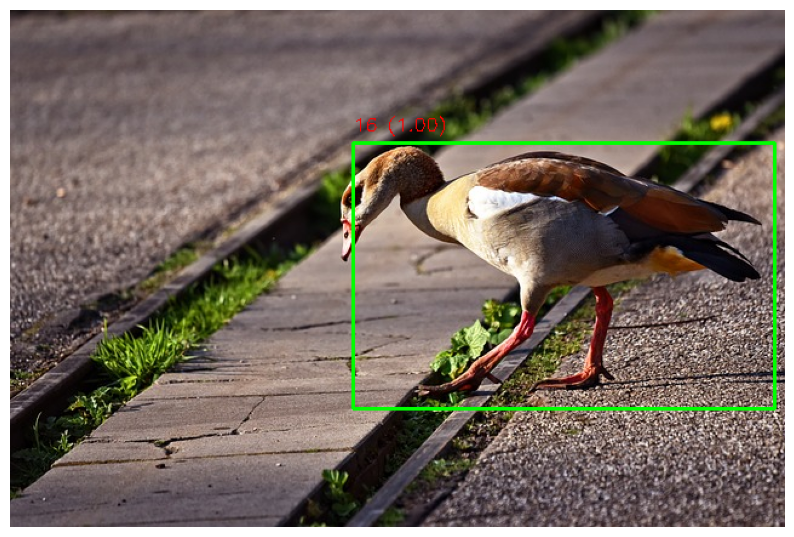

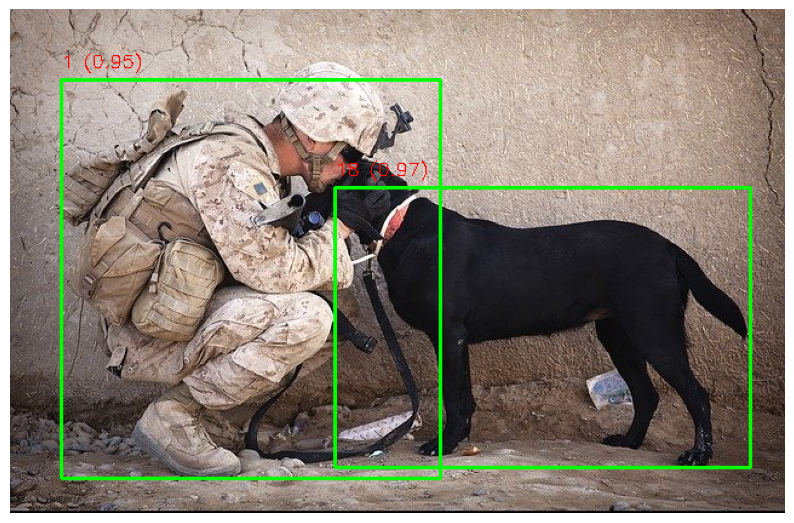

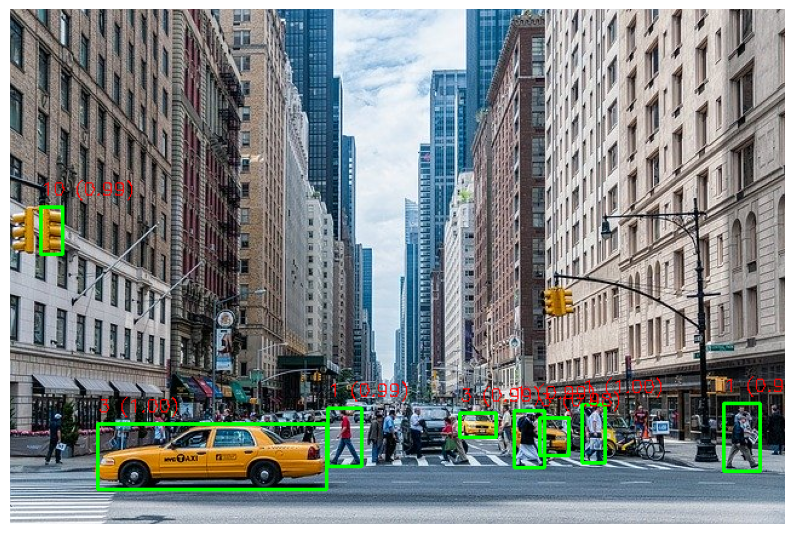

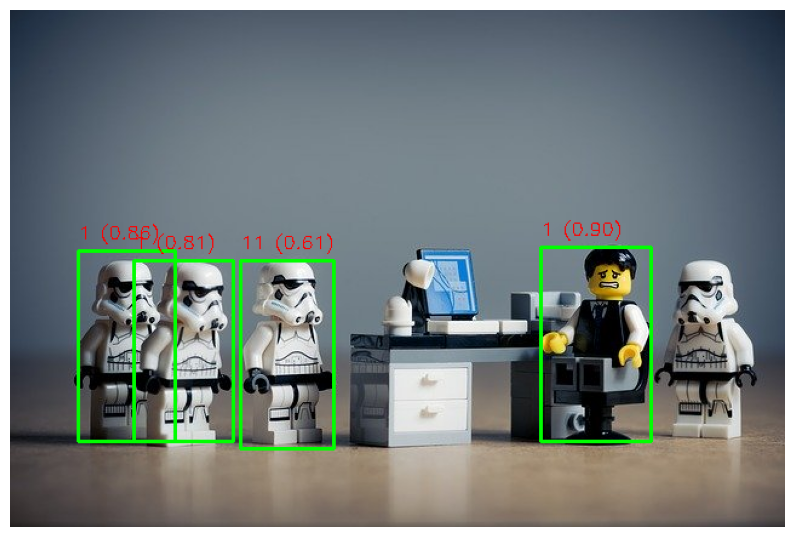

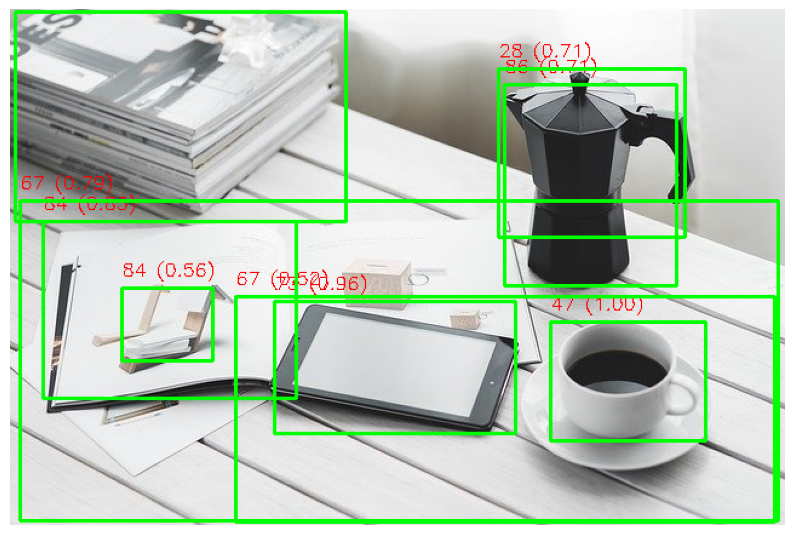

In [66]:
for i in im_np:
  plt.figure(figsize=(10,10))
  plt.imshow(i)
  plt.axis('off')
  plt.show()